<a href="https://colab.research.google.com/github/kiddhcx/CMPUT-566/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVD and Clustering

Importing libraries you might need

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

In [3]:
from google.colab import drive
#make sure you give the necessary authorization for colab to access your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive



we will use seed dataset : https://archive.ics.uci.edu/ml/datasets/seeds

You can download it from : https://archive.ics.uci.edu/ml/machine-learning-databases/00236/

In [6]:
# preparing the dataset
path = '/content/drive/MyDrive/seeds_dataset.txt'# path to seeds_dataset.txt


df = pd.read_csv(path,delimiter ='\t', header = None, on_bad_lines='skip')
df = df.rename(columns = {7:'label'})
x = df.drop(['label'],axis = 1)
y = df['label']
x # you will be transforming this data with svd

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


## Part 1 -  Applying Truncated SVD on the dataset. [ 2 marks ]

Use Truncated SVD to reduce dimensionality of x. You can use [sklearn's TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)

You can use ``` explained_variance_ratio_ ``` attribute of ```sklearn.decomposition.TruncatedSVD``` to make sure the number of final components after data transformation explain at least 80% of the variance.

In [29]:
# your code to transform the data using svd
svd = TruncatedSVD(n_components=2)
x = svd.fit_transform(x)
print ( "Components = ", svd.n_components , ";\nTotal explained variance = ",
      round(svd.explained_variance_ratio_.sum(),5)  )

Components =  2 ;
Total explained variance =  0.92778


## Part 2 -  Use K-Means to cluster the data [ 3 marks ]

Note: Use the data transformed using SVD

### a. Use Elbow method to find the right number of clusters. Include a plot and justify you choice. 

Elbow method, among many, can be used in clustering to find the optimal number of clusters. You can read more about Elbow method [here](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) and you can implement the Elbow method in any way ( i.e. you can choose any scoring parameter. There are some implementations which use Within-Cluster Sum of Square while some use variance explained). One of the implementation that you can use can be found [here](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html). You can try clusters ranging from 1 to 10 to find the right number of clusters. Please plot the used scoring parameter for different number of clusters and then explain why you decided on a certain number of clusters. 

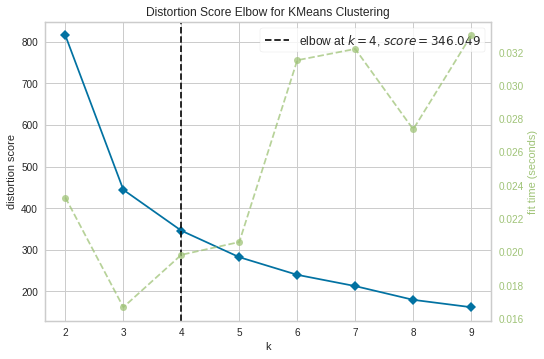

In [36]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()


### b. Use kmeans to cluster the data. 

You can use [sklearn's implementation of kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 

In [39]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(x)
y_kmeans = kmeans.predict(x)

### c. Visualize the clusters.

Note - You may use [matplotlib's scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html/) and its 'c' argument to visualize different clusters. The predicted clusters using kmeans can be used as labels and then plotted using a scatterplot. You can use something [like this](https://www.folkstalk.com/tech/how-to-plot-a-single-cluster-with-code-examples/) to plot the desired number of clusters. 

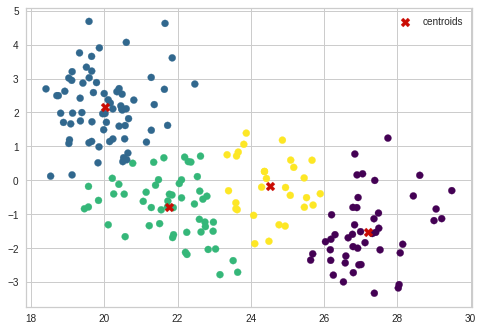

In [52]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0], y=x[:,1], c = y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

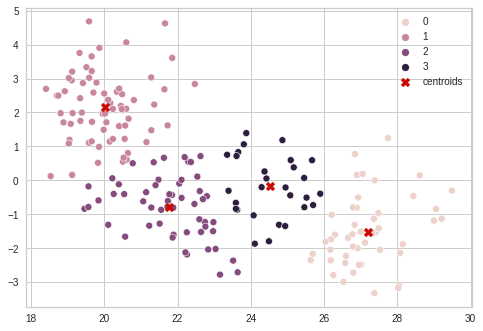

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=x, x=x[:,0], y=x[:,1], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## Part 3 -  Use Agglomerative Hierarchical Clustering to cluster the data [ 3 marks ]

For Agglomerative hierarchichal clustering, you can use [Scipy's implementation](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) or [Sklearn's implementation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). i.e. you can either use ```scipy.cluster.hierarchy ```
or ``` sklearn.cluster.AgglomerativeClustering```


 We recommend to use Scipy for both dendogram and the agglomerative clustering. However, you can use any library.

### a. Use Dendogram to find the right number of clusters. Justify your choice. 

Use a [Dendogram](https://towardsdatascience.com/hierarchical-clustering-explained-e59b13846da8) to decide the optimal number of clusters. Also explain why you decided on a certain number. 

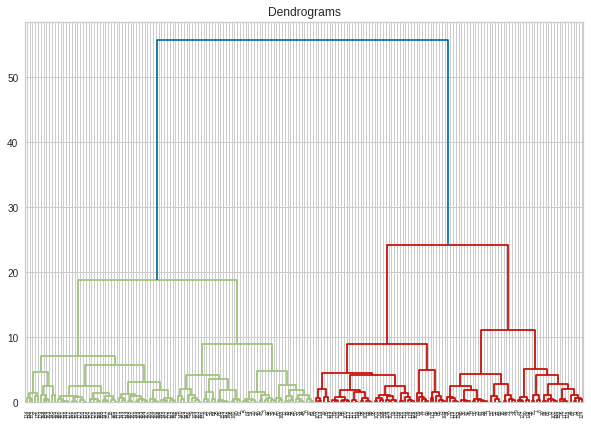

In [72]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))

###  b. Cluster the data

In [73]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward', compute_full_tree=True)

# Cluster the data
cluster.fit_predict(x)


array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1,
       3])

### c. Visualize the clusters

Use the same method as in (ii) c to visualise the predicted clusters.

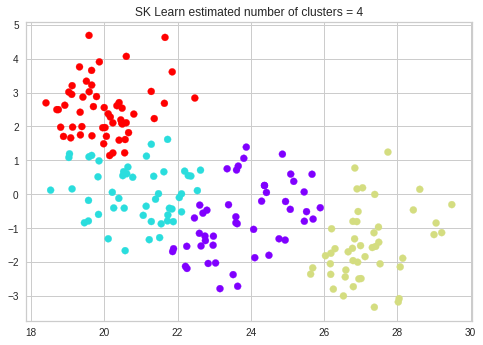

In [80]:
# Display the clustering graphically in a plot
plt.scatter(x[:,0],x[:,1], c=cluster.labels_, cmap='rainbow')
plt.title(f"SK Learn estimated number of clusters = {cluster.n_clusters_}")
plt.show()


## Part 4 -   Consider the [DBSCAN algorithm](https://en.wikipedia.org/wiki/DBSCAN). In which situation would you prefer DBSCAN over the two algorithms discussed above? [ 2 mark ]